## Amazon Review Data : Data Exploration

### Setup spark

In [1]:
import os, pickle, glob
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

import matplotlib.pyplot as plt

import pyspark.sql.functions as F

Matplotlib created a temporary cache directory at /scratch/clin6/job_30513706/matplotlib-2mmnavry because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
sc = SparkSession.builder \
    .config("spark.driver.memory", "64g") \
	.config("spark.executor.memory", "32g") \
    .config('spark.executor.instances', 2) \
	.appName("Amazon Reviews") \
	.getOrCreate()

In [3]:
sqlContext = SQLContext(sc)

/usr/local/spark/python/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


## Read Data

### Get files

In [4]:
#######################################################################################
###################### change path to: "../clin6/amazon_data" #########################
#######################################################################################
path = "../clin6/amazon_data"

In [5]:
def read(path):
    """
    Method that loads data file as df
    Takes in 1 parameter: path
    """
    return sc.read.csv(path, sep = "\t", header = True, inferSchema = True)

def get_path(file):
    """
    Method to create path
    Takes in 1 parameter: file name
    """
    return "amazon_data/%s" % file

In [6]:
dir = os.listdir(path)
files = [f for f in dir if os.path.isfile(os.path.join(path, f))]

def get_df(files):
    """
    Method that combines files into 1 big df
    Takes in 1 parameter: list of file names
    """
    df = None
    n = len(files)
    for i in range(n):
        data = read(get_path(files[i]))
        if df is None:
            df = data
        else:
            df = df.union(data)
    return df

# Data Preprocessing
* Finish major preprocessing, this includes scaling and/or transforming your data, imputing your data, encoding your data, feature expansion, Feature expansion (example is taking features and generating new features by transforming via polynomial, log multiplication of features).

### Take care of missing categories

In [7]:
product_category_col = 'product_category'

In [8]:
def get_imputed_df(files, category = True):
    """
    Method that combines files into 1 big df
    Takes in 1 parameter: list of file names
    """
    df = None
    n = len(files)
    for i in range(1):
        data = read(get_path(files[i]))
        
        # Fill in null categories
        if category:
            data = data.withColumn(product_category_col,
                                   F.col(product_category_col)).fillna(files[i][18:-10])
        
        if df is None:
            df = data
        else:
            df = df.union(data)
    return df

### Get df and Removing Repetitive/Unnecessary Information

In [9]:
df = get_imputed_df(files).drop('marketplace', 'vine').cache()
sqlContext.registerDataFrameAsTable(df, "df")

In [10]:
columns = df.columns
num_cols = len(columns)

### Filter rows with missing body and date 

In [11]:
review_body_col = 'review_body'
review_date_col = 'review_date'

In [12]:
df.filter(df[review_body_col].isNotNull() & df[review_date_col].isNotNull())

DataFrame[customer_id: int, review_id: string, product_id: string, product_parent: int, product_title: string, product_category: string, star_rating: int, helpful_votes: int, total_votes: int, verified_purchase: string, review_headline: string, review_body: string, review_date: date]

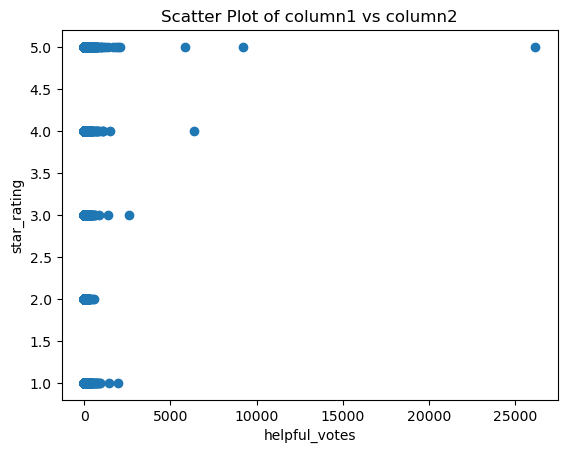

In [13]:
selected_columns = df.select("helpful_votes", "star_rating")
data = selected_columns.collect()
x = [row.helpful_votes for row in data]
y = [row.star_rating for row in data]
plt.scatter(x, y)
plt.title("Scatter Plot of column1 vs column2")
plt.xlabel("helpful_votes")
plt.ylabel("star_rating")
plt.show()

# Data modeling
* Train your first model

# Data Evaluation
* Evaluate your model and compare training vs. test error

# Answer the questions
* Where does your model fit in the fitting graph? and What are the next models you are thinking of and why?

# Conclusion section
* What is the conclusion of your 1st model? What can be done to possibly improve it?